# Exploratory Data Analysis on Black Friday Sales

Here we are going to analyze Black Friday Sales.
Datasets is found here:- https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

### Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (product id and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Downloading the Datasets
we will download datasets with help of `opendatasets`

In [8]:
pip install opendatasets --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [9]:
import opendatasets as od

In [10]:
od.download("https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinayakpandey8
Your Kaggle Key: ········


100%|██████████| 5.48M/5.48M [00:00<00:00, 51.3MB/s]

In [11]:
import os

In [12]:
data_dir = "black-friday-sales-eda"

In [13]:
os.listdir(data_dir)

['train.csv']

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv(data_dir+ '/train.csv')

In [16]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Here we found 550068 rows and 12 columns.

As we downloaded our datasets Now we have to Perform Some Data Cleaning and handling missing values.

### DATA PREPROCESSING

- Check basic statistics of dataset

- Check for missing values in the data

- check for unique values in data

- Perform EDA

- check for outliers

- Drop unnecessary fields

- Convert categorical data into integer using map function (e.g 'Gender' column)

- missing value treatment

- Rename columns

- fill nan values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


We can see here that there are many Null Value in `Product_Category_2` and `Product_Category_3` Columns.

In [18]:
df.Product_Category_2

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64

In [19]:
df.Product_Category_3

0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_3, Length: 550068, dtype: float64

Here there is many missing data in two Columns so we can assign null value as 0 in these columns but this is not right Approach of Data Cleaning. 

we should have to ask the clients about missing values and ask more data which can define null values more accurate.

In [20]:
df.Product_Category_2 = df.Product_Category_2.fillna(0)

In [21]:
df.Product_Category_3 = df.Product_Category_3.fillna(0)

In [22]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


We have done our data cleaning Now we will analyze our Data which give us more information about Data.

### Data Visualisation
Now we are going to visualize our Data in meaningful results.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [27]:
df.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [28]:
len(df.Product_ID.unique())

3631

In [29]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

#### Gender

In [37]:
count = df.Gender.unique()
count

array(['F', 'M'], dtype=object)

In [40]:
values = df.Gender.value_counts()
values

M    414259
F    135809
Name: Gender, dtype: int64

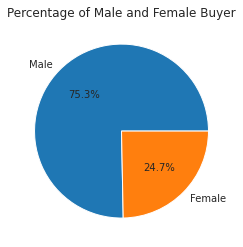

In [42]:
plt.title("Percentage of Male and Female Buyer")
plt.pie(values,labels=["Male","Female"],autopct="%1.1f%%");

There are around 75.3% Buyer are Male and 24.7% are Female.

#### Age

In [43]:
age_count = df.Age.value_counts()
age_count

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

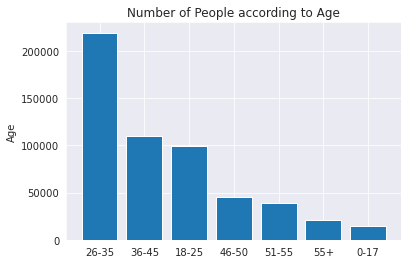

In [44]:
plt.title("Number of People according to Age")
plt.ylabel("Age")
plt.bar(age_count.index, age_count);

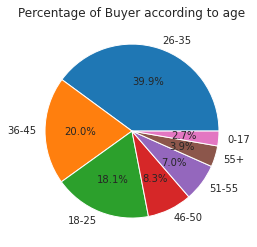

In [45]:
plt.title("Percentage of Buyer according to age")
plt.pie(age_count,labels= age_count.index,autopct="%1.1f%%");

Here we found that there are more than 2 lakh buyers lies between 26-35 age which is around 39.9%

#### City

In [20]:
city_count = df.City_Category.value_counts()
city_count

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

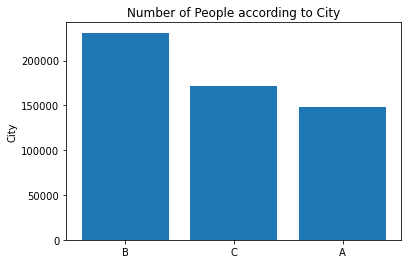

In [21]:
plt.title("Number of People according to City")
plt.ylabel("City")
plt.bar(city_count.index, city_count);

Maximum Number of people comes from City B

#### Marital Status

In [49]:
maritial = df.Marital_Status.value_counts()
maritial

0    324731
1    225337
Name: Marital_Status, dtype: int64

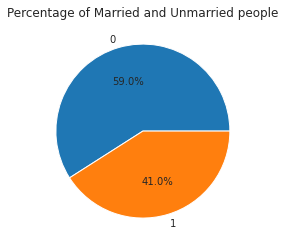

In [50]:
plt.title("Percentage of Married and Unmarried people")
plt.pie(maritial,labels= maritial.index,autopct="%1.1f%%");

59% of buyers are UnMarried and rest are Married

#### City vs Purchase

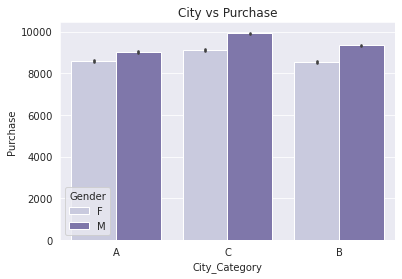

In [54]:
plt.title('City vs Purchase')
sns.barplot(data=df,x='City_Category',y='Purchase',hue='Gender',palette='Purples');

From Upper Graph we found that maximum number of purchase done by male of City `C`.

### Conclusion
We have done Exploratory Data Analysis on Black Friday Sales datasets.
we have downloaded our datasets from kaggle with the help of Opendatasets library.
After downloading data we have filled null data by 0 under Product catogry 2 and 3.
AT last we have visualized our data by Matplotlib and Seaborn.

In Data Visualization we have done:-
- Percentage of Male and Female Buyers in Pie-Chart
- Number of People according to Age
- Percentage of Buyer according to age
- Number of People according to City
- Percentage of Married and Unmarried people
- City vs Purchase


In [22]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>